Connect to Google Drive

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


Read Dataset

In [107]:
import pandas as pd
import pandas as lag_plot
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df = pd.read_csv("wmt.us.txt")
df1 = pd.read_csv('tgt.us.txt')

print(df.head())
print('\n')
print(df1.head())

         Date     Open     High      Low    Close   Volume  OpenInt
0  1972-03-20  0.03403  0.03403  0.03403  0.03403  3132119        0
1  1972-03-22  0.03403  0.04251  0.03403  0.03403  1084194        0
2  1972-03-23  0.03403  0.04251  0.03403  0.03403   783030        0
3  1972-03-24  0.03403  0.04251  0.03403  0.03403  1264892        0
4  1972-03-27  0.04251  0.04251  0.04251  0.04251  1385361        0


         Date    Open    High     Low   Close   Volume  OpenInt
0  1983-04-06  1.6351  1.6434  1.6269  1.6434  2170898        0
1  1983-04-07  1.6598  1.7093  1.6598  1.7016  3699535        0
2  1983-04-08  1.7016  1.7093  1.7016  1.7016  2816067        0
3  1983-04-11  1.7016  1.7260  1.6928  1.7176  1299052        0
4  1983-04-12  1.7176  1.7424  1.7176  1.7424  2365608        0


Data Type

In [109]:
print(df.dtypes)
df['Date'] = pd.to_datetime(df['Date'])

print(df.dtypes)
df1['Date'] = pd.to_datetime(df1['Date'])

print(df.dtypes)
print(df1.dtypes)

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object
Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object
Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object
Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object


Detail Dataset

In [112]:
print('Walmart')
print(df.head())
print(df.shape)
print(df.columns)
print('\n')

print('Target')
print(df1.head())
print(df1.shape)
print(df1.columns)

Walmart
        Date     Open     High      Low    Close   Volume  OpenInt
0 1972-03-20  0.03403  0.03403  0.03403  0.03403  3132119        0
1 1972-03-22  0.03403  0.04251  0.03403  0.03403  1084194        0
2 1972-03-23  0.03403  0.04251  0.03403  0.03403   783030        0
3 1972-03-24  0.03403  0.04251  0.03403  0.03403  1264892        0
4 1972-03-27  0.04251  0.04251  0.04251  0.04251  1385361        0
(11443, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


Target
        Date    Open    High     Low   Close   Volume  OpenInt
0 1983-04-06  1.6351  1.6434  1.6269  1.6434  2170898        0
1 1983-04-07  1.6598  1.7093  1.6598  1.7016  3699535        0
2 1983-04-08  1.7016  1.7093  1.7016  1.7016  2816067        0
3 1983-04-11  1.7016  1.7260  1.6928  1.7176  1299052        0
4 1983-04-12  1.7176  1.7424  1.7176  1.7424  2365608        0
(8726, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


Visualisasi Harga Asli

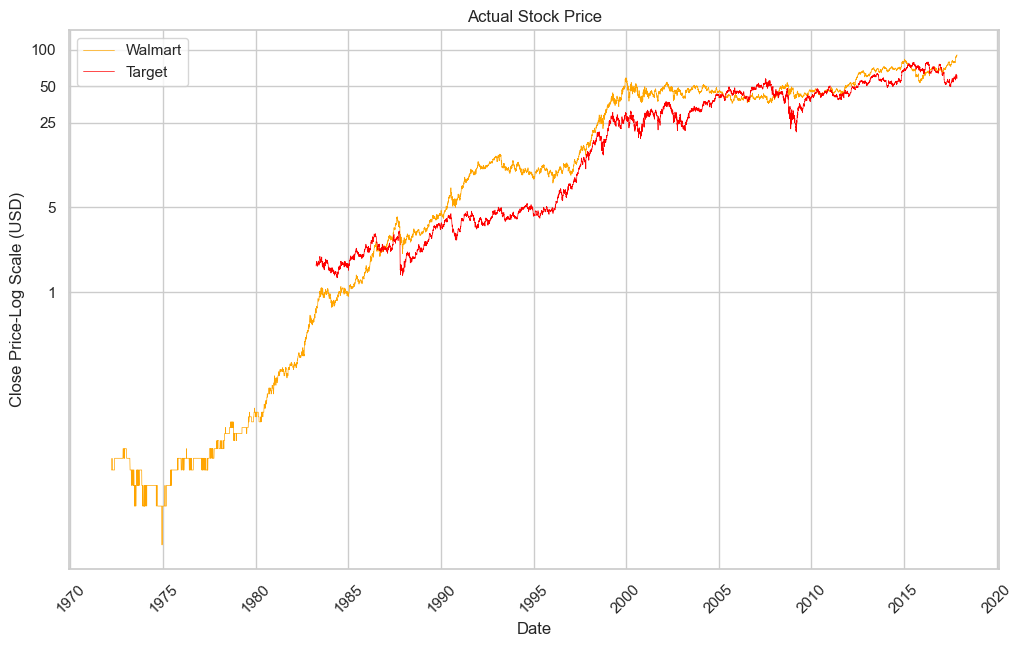

In [115]:
plt.figure(figsize=(12, 7))
sns.set_theme(style='whitegrid')

sns.lineplot(data=df, x='Date', y='Close', linewidth=0.5, color='orange', label='Walmart')
sns.lineplot(data=df1, x='Date', y='Close', linewidth=0.5, color='red', label='Target')
plt.yscale('log')
plt.title('Actual Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price-Log Scale (USD)')
plt.xticks(rotation=45)

# Menentukan tanda sumbu dan labelnya
ticks = [1, 5, 25, 50, 100]
labels = ['1', '5', '25', '50', '100']
plt.yticks(ticks, labels)

plt.legend()
plt.show()


Cumulative Return

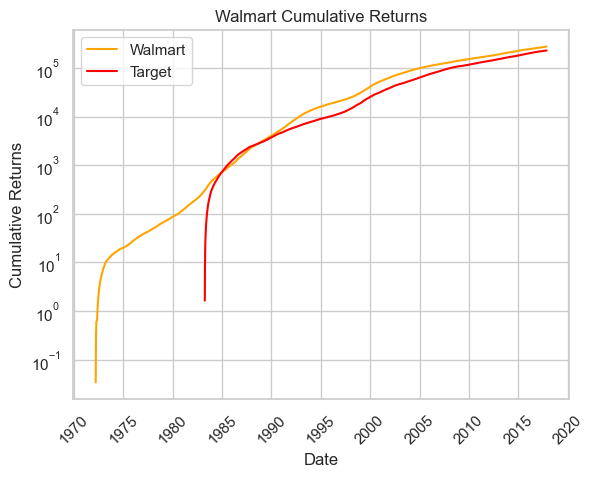

In [118]:
dr = df['Close'].cumsum()
dr1 = df1['Close'].cumsum()

sns.lineplot(data=df, x='Date', y=dr, color='orange', label='Walmart')
sns.lineplot(data=df1, x='Date', y=dr1, color='red', label='Target')
plt.yscale('log')
plt.title('Walmart Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.xticks(rotation=45)
plt.show()


ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

In [123]:
print(df['Date'].iloc[-1], ('\n')*2, df1['Date'].iloc[-1])


2017-11-10 00:00:00 

 2017-11-10 00:00:00


Split Data

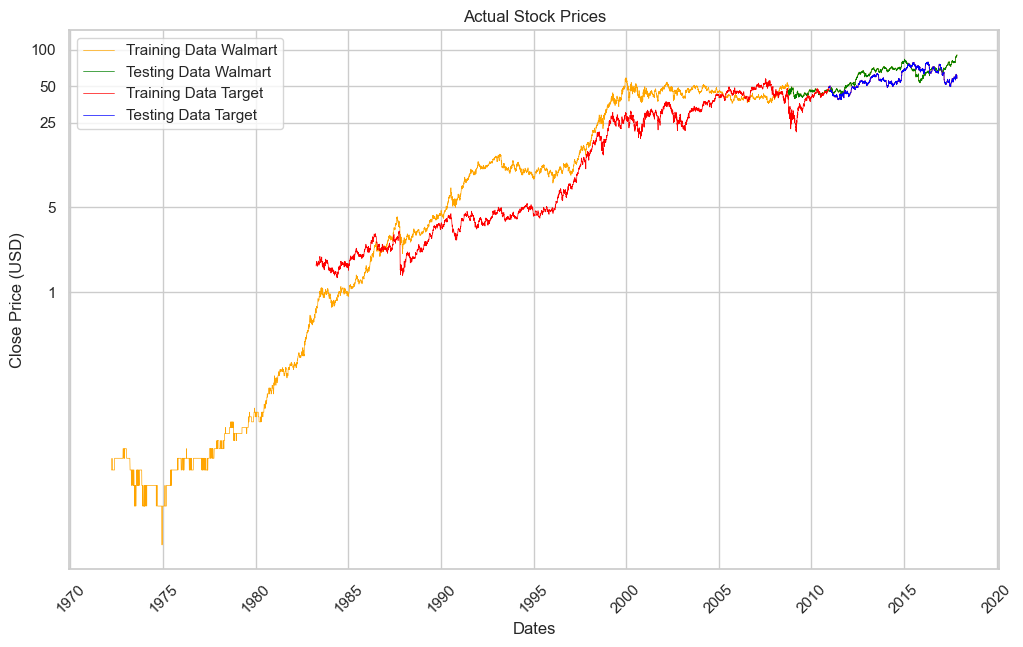

In [124]:
#split walmart
train_data_wmt, test_data_wmt = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
#split target
train_data_tgt, test_data_tgt = df1[0:int(len(df1)*0.8)], df1[int(len(df1)*0.8):]

sns.set_theme(style='whitegrid')

plt.figure(figsize=(12, 7))
#line plot walmart
sns.lineplot(data=df, x='Date', y='Close', color='orange', label='Training Data Walmart', linewidth=0.5)
sns.lineplot(data=test_data_wmt, x='Date', y='Close', color='green', label='Testing Data Walmart', linewidth=0.5)
#line plot target
sns.lineplot(data=df1, x='Date', y='Close', color='red', label='Training Data Target', linewidth=0.5)
sns.lineplot(data=test_data_tgt, x='Date', y='Close', color='blue', label='Testing Data Target', linewidth=0.5)

plt.title('Actual Stock Prices')
plt.yscale('log')
plt.xlabel('Dates')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)

ticks = [1, 5, 25, 50, 100]
labels = ['1', '5', '25', '50', '100']
plt.yticks(ticks, labels)

plt.legend()
plt.show()


Rumus SMAPE

In [125]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

ARIMA Walmart

In [126]:
train_ar = train_data_wmt['Close'].values
test_ar = test_data_wmt['Close'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.442
Symmetric mean absolute percentage error: 0.789


ARIMA Target

In [131]:
train_ar_tgt = train_data_tgt['Close'].values
test_ar_tgt = test_data_tgt['Close'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history1 = [x for x in train_ar_tgt]
print(type(history1))
predictions1 = list()
for i in range(len(test_ar_tgt)):
    model1 = ARIMA(history1, order=(5,1,0))
    model_fit1 = model1.fit()
    output1 = model_fit1.forecast()
    yhat1 = output1[0]
    predictions1.append(yhat1)
    obs1 = test_ar_tgt[i]
    history1.append(obs1)
    #print('predicted=%f, expected=%f' % (yhat, obs))

error_tgt = mean_squared_error(test_ar_tgt, predictions1)
print('Testing Mean Squared Error: %.3f' % error_tgt)

error_tgt2 = smape_kun(test_ar_tgt, predictions1)
print('Symmetric mean absolute percentage error: %.3f' % error_tgt2)

<class 'list'>
Testing Mean Squared Error: 0.623
Symmetric mean absolute percentage error: 0.931


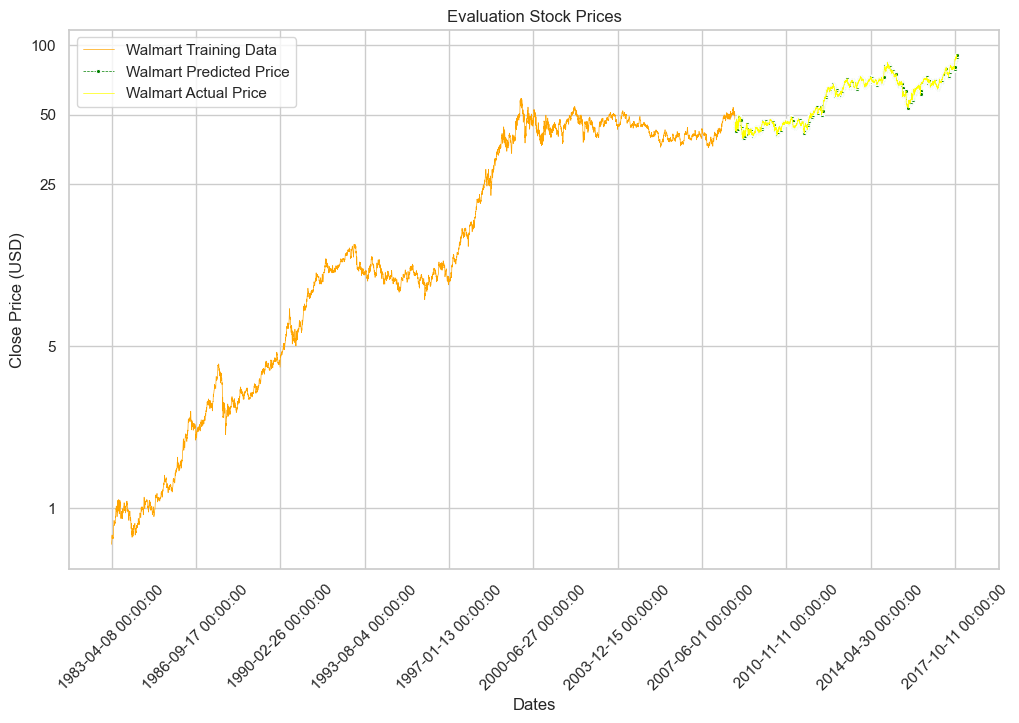

In [164]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(12, 7))

# Visualisasi Walmart
sns.lineplot(data=train_data_wmt[2720:], x=train_data_wmt[2720:].index, y='Close', color='orange', label='Walmart Training Data', linewidth=0.5)
sns.lineplot(data=test_data_wmt, x=test_data_wmt.index, y=predictions, color='green', marker='o', markersize=3,
             linestyle='dashed', label='Walmart Predicted Price', linewidth=0.5)
sns.lineplot(data=test_data_wmt, x=test_data_wmt.index, y=test_data_wmt['Close'], color='yellow', label='Walmart Actual Price', linewidth=0.5)

plt.title('Evaluation Stock Prices')
plt.yscale('log')
plt.xlabel('Dates')
plt.ylabel('Close Price (USD)')
plt.xticks(np.arange(2720, 11443, 870), df['Date'][2720:11443:870], rotation=45)

ticks = [1, 5, 25, 50, 100]
labels = ['1', '5', '25', '50', '100']
plt.yticks(ticks, labels)

plt.legend()
plt.show()


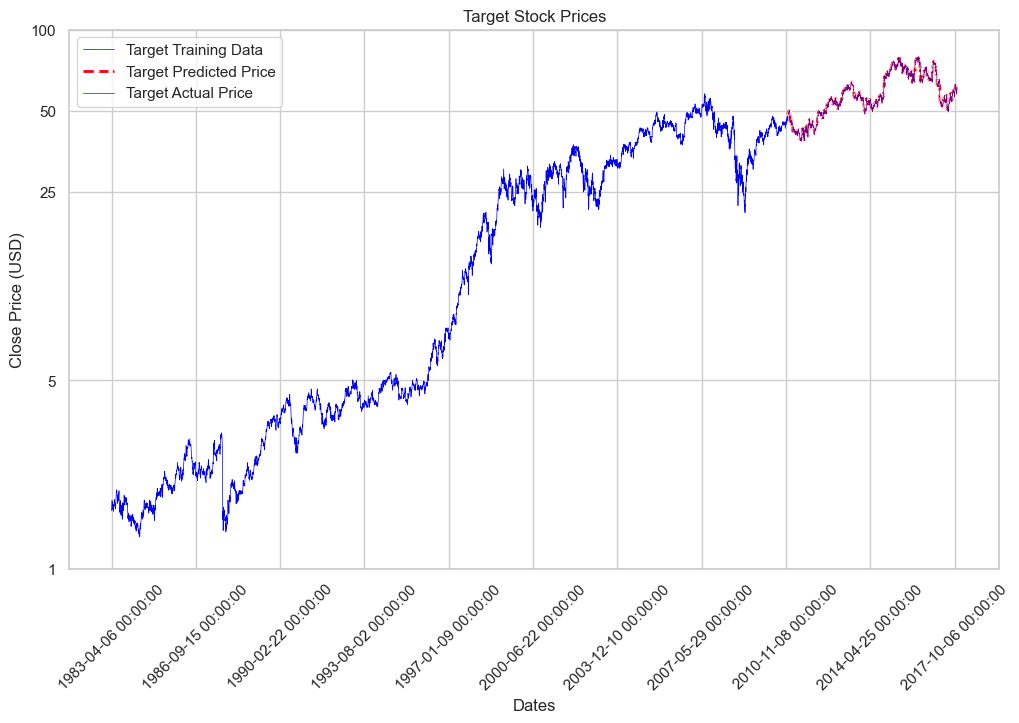

In [165]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(12, 7))

# Visualisasi Target
sns.lineplot(data=train_data_tgt, x=train_data_tgt.index, y='Close', color='blue', label='Target Training Data', linewidth=0.5)
sns.lineplot(data=test_data_tgt, x=test_data_tgt.index, y=predictions1, color='red', marker='o', markersize=1,
             linestyle='dashed', label='Target Predicted Price', linewidth=2)
sns.lineplot(data=test_data_tgt, x=test_data_tgt.index, y=test_data_tgt['Close'], color='purple', label='Target Actual Price', linewidth=0.5)

plt.title('Target Stock Prices')
plt.yscale('log')
plt.xlabel('Dates')
plt.ylabel('Close Price (USD)')
plt.xticks(np.arange(0, 8726, 870), df1['Date'][0:8726:870], rotation=45)

ticks = [1, 5, 25, 50, 100]
labels = ['1', '5', '25', '50', '100']
plt.yticks(ticks, labels)

plt.legend()
plt.show()

Prediction x Actual

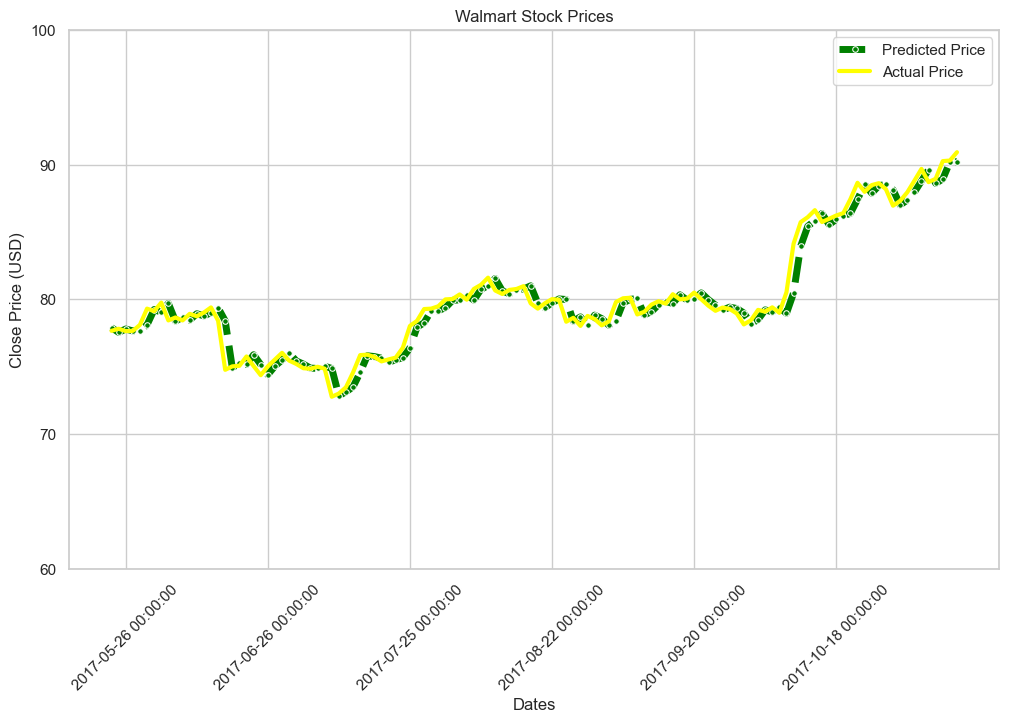

In [170]:
plt.figure(figsize=(12,7))

sns.lineplot(data=test_data_wmt[-120:], x=test_data_wmt.index[-120:], y=predictions[-120:], color='green', marker='o', markersize=4,
             linestyle='dashed', label='Predicted Price', linewidth=5)
sns.lineplot(data=test_data_wmt[-120:], x=test_data_wmt.index[-120:], y=test_data_wmt['Close'][-120:], color='yellow', label='Actual Price', linewidth=3)

plt.title('Walmart Stock Prices')
#plt.yscale('log')
plt.xlabel('Dates')
plt.ylabel('Close Price (USD)')

plt.xticks(np.arange(11325, 11443, 20), df['Date'][11325:11443:20], rotation=45)

ticks = [60, 70, 80, 90, 100]
labels = ['60', '70', '80', '90', '100']
plt.yticks(ticks, labels)

plt.legend()
plt.show()

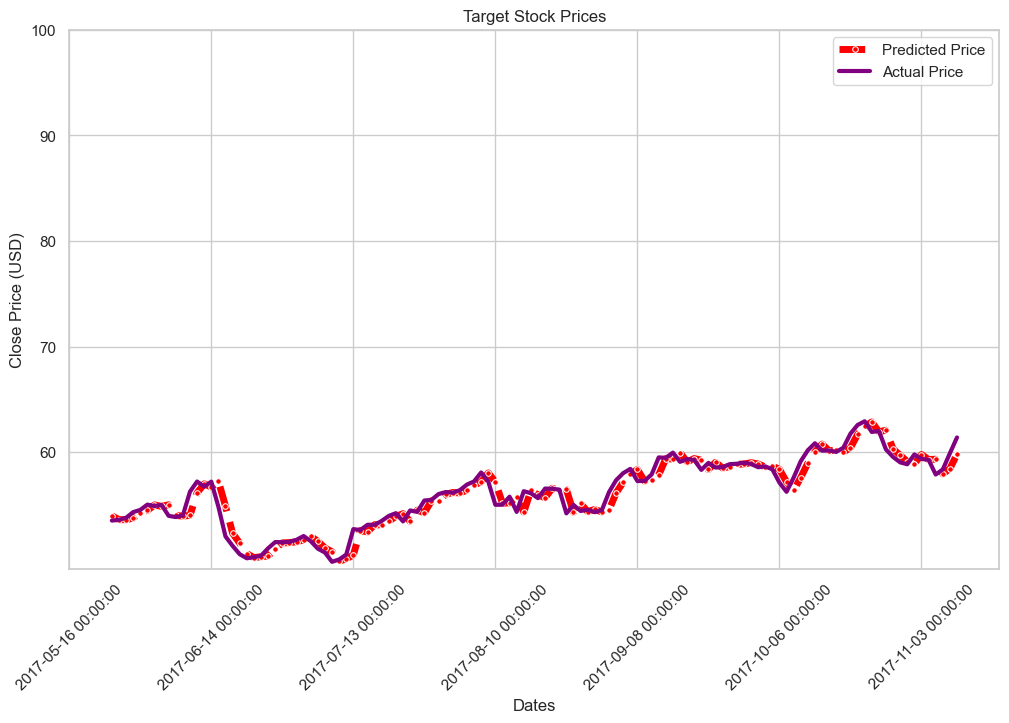

In [173]:
plt.figure(figsize=(12,7))

sns.lineplot(data=test_data_tgt[-120:], x=test_data_tgt.index[-120:], y=predictions1[-120:], color='red', marker='o', markersize=4,
             linestyle='dashed', label='Predicted Price', linewidth=5)
sns.lineplot(data=test_data_tgt[-120:], x=test_data_tgt.index[-120:], y=test_data_tgt['Close'][-120:], color='purple', label='Actual Price', linewidth=3)

plt.title('Target Stock Prices')
#plt.yscale('log')
plt.xlabel('Dates')
plt.ylabel('Close Price (USD)')

plt.xticks(np.arange(8600, 8726, 20), df1['Date'][8600:8726:20], rotation=45)

ticks = [60, 70, 80, 90, 100]
labels = ['60', '70', '80', '90', '100']
plt.yticks(ticks, labels)

plt.legend()
plt.show()